In [0]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
seed = 95

###Задача 1 "Парадокс инспектора"

Мы знаем, что автобусы ходят с 8:00 до 20:00, а это значит, что они ходят в течение 12 часов или 720 минут. Для удобства мы будем смотреть на момент времени в минутах от начала рабочего дня.

In [2]:
np.random.seed(seed)
all=[] #список количества автобусов по дням
timon = [] #список с количеством пассажиров в автобусах, выбранных Тимоном
pumba = [] #список с количеством пассажиров в автобусах, выбранных Пумбой
for i in tqdm(range(10000)):
  day = 0 
  cnt = 1
  avt = [0]
  while day < 720:
    vr = np.random.choice([5,10])
    day+=vr
    if day <= 720:
      avt.append(vr)
      cnt +=1
    else:
      continue
  timon.append(np.random.choice(avt))
  pum = np.random.uniform(0,720) #время от начала рабочего дня в минутах, через которое сел Пумба
  b = np.cumsum(np.array(avt))-pum
  try:
    pumba.append(avt[np.where(b == min(b[b>0]))[0][0]]) #присоединям количество пассажиров в автобусе, в который сядет Пумба
  except:
    continue
  all.append(cnt)

100%|██████████| 10000/10000 [00:06<00:00, 1487.30it/s]


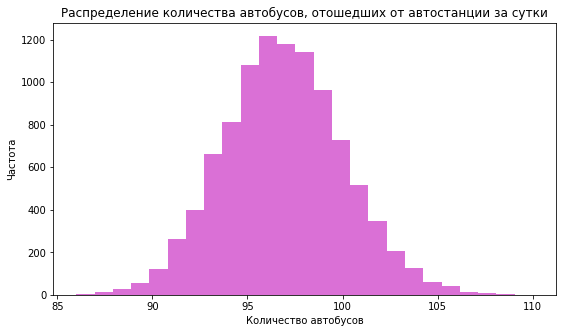

In [3]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(all, bins=len(set(all)), color='orchid')
ax.set_title('Распределение количества автобусов, отошедших от автостанции за сутки')
ax.set_ylabel('Частота')
ax.set_xlabel('Количество автобусов')
plt.show()

Распределение действительно очень напоминает нормальное

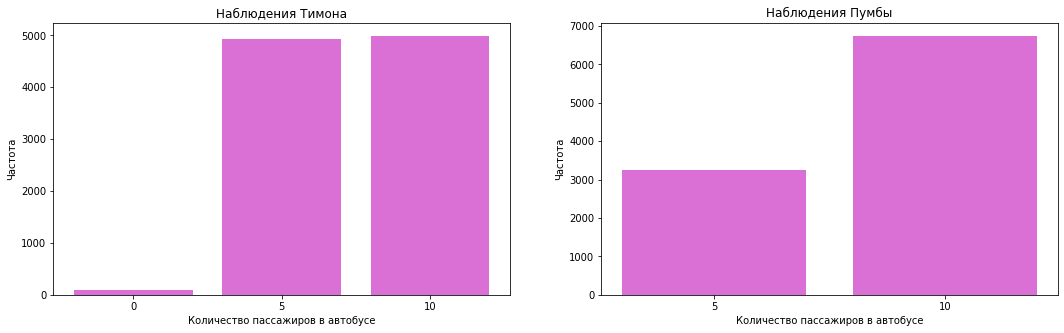

In [4]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].bar(list(map(str,np.unique(timon, return_counts=True)[0])), height= np.unique(timon, return_counts=True)[1], color='orchid')
ax[0].set_title('Наблюдения Тимона')
ax[0].set_ylabel('Частота')
ax[0].set_xlabel('Количество пассажиров в автобусе')
ax[1].bar(list(map(str,np.unique(pumba, return_counts=True)[0])), height= np.unique(pumba, return_counts=True)[1], color='orchid')
ax[1].set_title('Наблюдения Пумбы')
ax[1].set_ylabel('Частота')
ax[1].set_xlabel('Количество пассажиров в автобусе')
plt.show()

In [5]:
#Для Тимона
sred = np.array(timon).sum()/len(timon)
vibdisp =((np.array(timon) - np.array([sred]* len(timon)))**2).sum()/(len(timon)-1)
print(f'Оценка математического ожидания для Тимона: {sred:.4}')
print(f'Несмещенная оценка дисперсии для Тимона: {vibdisp: .4}')
#Для Пумбы
sred1 = np.array(pumba).sum()/len(pumba)
vibdisp1 =((np.array(pumba) - np.array([sred]* len(pumba)))**2).sum()/(len(pumba)-1)
print(f'Оценка математического ожидания для Пумбы: {sred1:.4}')
print(f'Несмещенная оценка дисперсии для Пумбы: {vibdisp1: .4}')

Оценка математического ожидания для Тимона: 7.446
Несмещенная оценка дисперсии для Тимона:  6.723
Оценка математического ожидания для Пумбы: 8.375
Несмещенная оценка дисперсии для Пумбы:  6.349


Наполненность автобуса Пумбы зависит от времени ожидания (чем дольше время ожидания, тем больше вероятность попасть в этот промежуток), поэтому Пумба будет в среднем иметь больше людей в автобусе, в то время как Тимон выбирает любой автобус равновероятно. Средняя заполненность его автобусов будет стремиться к среднему времени ожидания с поправкой на то, что он иногда выбирает нулевой автобус, то есть приходящий в 8:00 

Теперь время между автобусами будет распределено экспоненциально со средним в 10 минут.

In [7]:
np.random.seed(seed)
all=[] #список количества автобусов по дням
timon = [] #список с количеством пассажиров в автобусах, выбранных Тимоном
pumba = [] #список с количеством пассажиров в автобусах, выбранных Пумбой
for i in tqdm(range(10000)):
  day = 0 
  cnt = 1
  avt = [0]
  while day < 720:
    vr = np.random.exponential(10)
    day+=vr
    if day <= 720:
      avt.append(vr)
      cnt +=1
    else:
      continue
  timon.append(round(np.random.choice(avt))) #округлим пассажиров, чтоб не было нецелых, и присоединеям Тимону
  pum = np.random.uniform(0,720) #время от начала рабочего дня в минутах, через которое сел Пумба
  b = np.cumsum(np.array(avt))-pum
  try:
    pumba.append(round(avt[np.where(b == min(b[b>0]))[0][0]])) #округляем и присоединям количество пассажиров в автобусе, в который сядет Пумба
  except:
    continue
  all.append(cnt)

100%|██████████| 10000/10000 [00:02<00:00, 3477.78it/s]


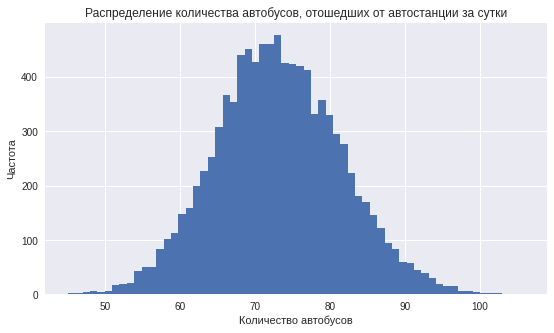

In [8]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(all, bins=len(set(all)))
ax.set_title('Распределение количества автобусов, отошедших от автостанции за сутки')
ax.set_ylabel('Частота')
ax.set_xlabel('Количество автобусов')
plt.show()

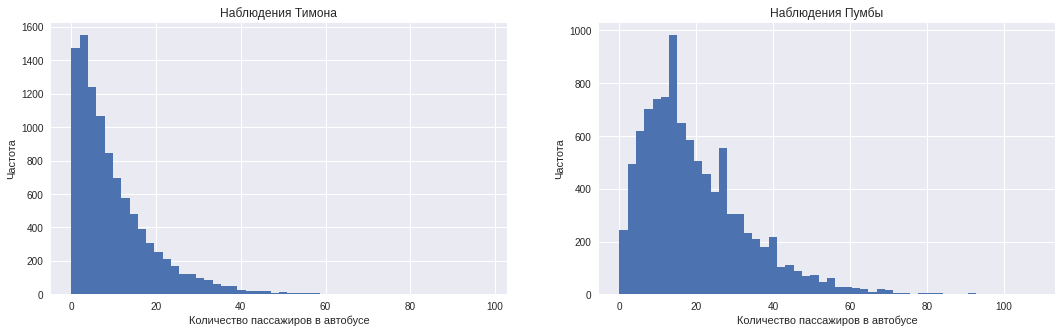

In [9]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].hist(timon, bins=50)
ax[0].set_title('Наблюдения Тимона')
ax[0].set_ylabel('Частота')
ax[0].set_xlabel('Количество пассажиров в автобусе')
ax[1].hist(pumba, bins=50)
ax[1].set_title('Наблюдения Пумбы')
ax[1].set_ylabel('Частота')
ax[1].set_xlabel('Количество пассажиров в автобусе')
plt.show()

In [10]:
#Для Тимона
sred = np.array(timon).sum()/len(timon)
vibdisp =((np.array(timon) - np.array([sred]* len(timon)))**2).sum()/(len(timon)-1)
print(f'Оценка математического ожидания для Тимона: {sred:.4}')
print(f'Несмещенная оценка дисперсии для Тимона: {vibdisp: .4}')
#Для Пумбы
sred1 = np.array(pumba).sum()/len(pumba)
vibdisp1 =((np.array(pumba) - np.array([sred]* len(pumba)))**2).sum()/(len(pumba)-1)
print(f'Оценка математического ожидания для Пумбы: {sred1:.4}')
print(f'Несмещенная оценка дисперсии для Пумбы: {vibdisp1: .4}')

Оценка математического ожидания для Тимона: 9.787
Несмещенная оценка дисперсии для Тимона:  94.42
Оценка математического ожидания для Пумбы: 19.78
Несмещенная оценка дисперсии для Пумбы:  288.2


Выводы: Разброс времени ожидания сильно вырос из-за снижения ожидаемого количества автобус за день. При этом Пумба стал встречать в среднем намного более заполненные автобусы, чем Тимон, поскольку наполненность его автобуса зависит от времени ожидания( чем дольше время ожидания, тем больше вероятность попасть в этот промежуток), в в то время как Тимон выбирает любой автобус равновероятно. Средняя заполненность его автобусов будет стремиться к среднему времени ожидания с поправкой на то, что он иногда выбирает нулевой автобус, то есть приходящий в 8:00

###Задача 2 "Парадокс Хуана Мануэля Родригеса Паррондо"

Решим для Атоса

In [0]:
np.random.seed(seed)
atos = 1000
vig = np.random.choice([1,-1], p = [0.49, 0.51], size=(10000,1000))
pohod = np.random.choice(np.arange(1,10001), size=10) # случайные посещения Атоса

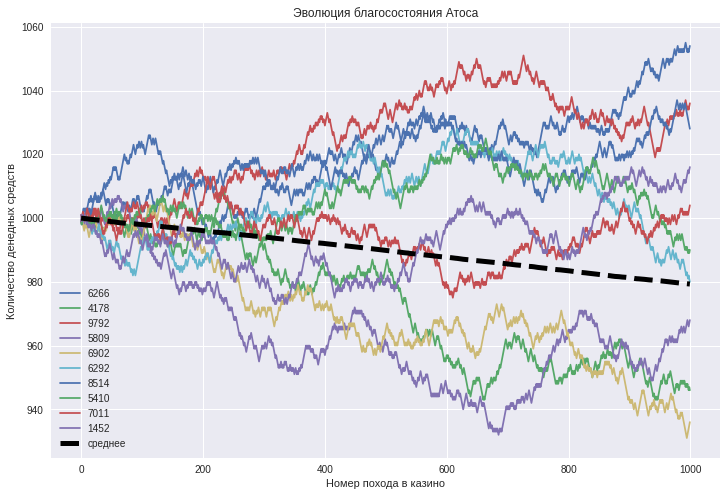

In [12]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(pohod)):
  ax.plot(vig[pohod[i]].cumsum()+1000)
  ax.legend([pohod[i]], fontsize = 'medium')
ax.plot(((vig.sum(axis=0)/10000).cumsum() +atos), '--', linewidth=5 , color = 'black')
ax.set_title('Эволюция благосостояния Атоса')
ax.set_xlabel('Номер похода в казино')
ax.set_ylabel('Количество денедных средств')
ax.legend([pohod[0],pohod[1],pohod[2],pohod[3],pohod[4],pohod[5],pohod[6],pohod[7],pohod[8],pohod[9], 'среднее'],fontsize = 'medium')
plt.show()

Решим для Портоса

In [13]:
np.random.seed(seed)
vig = np.random.choice([1,-1], p = [0.09, 0.91], size=(10000,1000)) # генерим выигрышы для кратных трем случаев
vigr = np.random.choice([1,-1], p = [0.74, 0.26], size=(10000,1000)) # генерим выигрышы для некратных трем случаев
vse = []
for j in tqdm(range(10000)):
  portos = 1000
  igra = []
  for i in range(1000):
    if portos % 3 == 0:
      portos += vig[j][i]
      igra.append(portos)
    else:
      portos += vigr[j][i]
      igra.append(portos)
  vse.append(igra) # все игры Портоса
pohod1 = np.random.choice(np.arange(1,10001), size=10) # случайные посещения Портоса

100%|██████████| 10000/10000 [00:11<00:00, 879.22it/s]


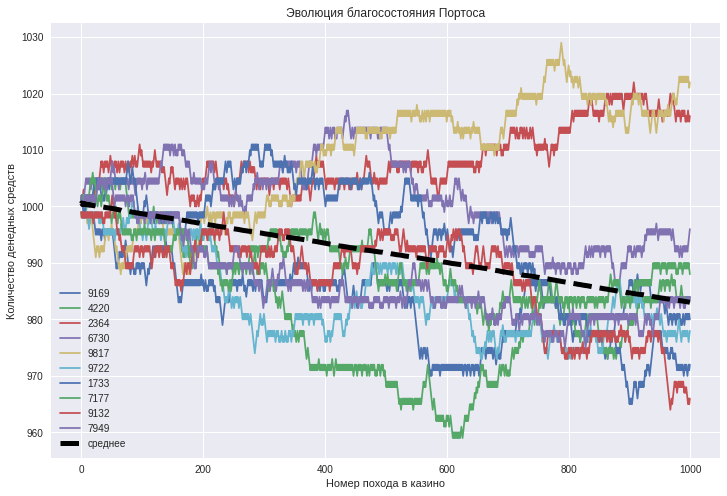

In [14]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(pohod1)):
  ax.plot(vse[pohod1[i]])
  ax.legend([pohod1[i]], fontsize = 'medium')
ax.plot(((np.array(vse).sum(axis=0)/10000)), '--', linewidth=5 , color = 'black')
ax.set_title('Эволюция благосостояния Портоса')
ax.set_xlabel('Номер похода в казино')
ax.set_ylabel('Количество денедных средств')
ax.legend([pohod1[0],pohod1[1],pohod1[2],pohod1[3],pohod1[4],pohod1[5],pohod1[6],pohod1[7],pohod1[8],pohod1[9], 'среднее'],fontsize = 'medium')
plt.show()

Решим для Арамиса

In [15]:
np.random.seed(seed)
vibor = np.random.choice(['А', 'Б'], size=(10000,1000)) #Выбор казино
viga = np.random.choice([1,-1], p = [0.49, 0.51], size=(10000,1000)) # Выигрыш в казино А
vigb1 = np.random.choice([1,-1], p = [0.09, 0.91], size=(10000,1000)) # Выигрыш в казино Б для кратных трем случаев
vigb2 = np.random.choice([1,-1], p = [0.74, 0.26], size=(10000,1000)) # Выигрыш в казино Б для некратных трем случаев
cash = []
for j in tqdm(range(10000)):
  aramis = 1000
  igra = []
  for i in range(1000):
    if vibor[j][i] == 'А':
      aramis += viga[j][i]
      igra.append(aramis)
    elif vibor[j][i] == 'Б':
      if aramis % 3 == 0:
        aramis += vigb1[j][i]
        igra.append(aramis)
      else:
        aramis += vigb2[j][i]
        igra.append(aramis)
  cash.append(igra) #Все игры Арамиса 
pohod2 = np.random.choice(np.arange(1,10001), size=10) # случайные посещения Арамиса

100%|██████████| 10000/10000 [00:18<00:00, 526.59it/s]


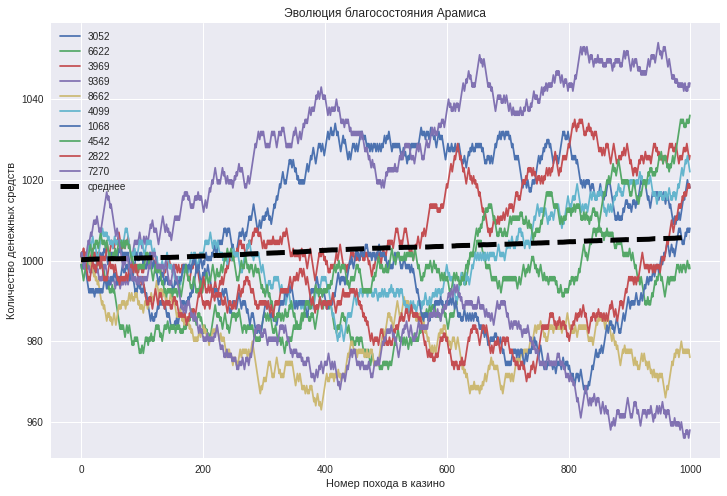

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(pohod2)):
  ax.plot(cash[pohod2[i]])
  ax.legend([pohod2[i]], fontsize = 'medium')
ax.plot(((np.array(cash).sum(axis=0)/10000)), '--', linewidth=5 , color = 'black')
ax.set_title('Эволюция благосостояния Арамиса')
ax.set_xlabel('Номер похода в казино')
ax.set_ylabel('Количество денежных средств')
ax.legend([pohod2[0],pohod2[1],pohod2[2],pohod2[3],pohod2[4],pohod2[5],pohod2[6],pohod2[7],pohod2[8],pohod2[9], 'среднее'],fontsize = 'medium')
plt.show()

In [17]:
(np.array(cash).sum(axis=0)/10000).max()

1005.7966

###Задача 3 "Парадокс Берксона"

In [0]:
np.random.seed(seed)
mat = np.random.normal(60,10, size = 10000)
rus = np.random.normal(60,10, size = 10000)
ege = mat + rus
n = np.arange(80,165,5)
proshel = []
neproshel = []
nprosh = []
for i in range(len(n)):
  nprosh.append(len(ege[ege>n[i]])) 
  proshel.append(np.where(ege>n[i]))
  neproshel.append(np.where(ege<n[i]))

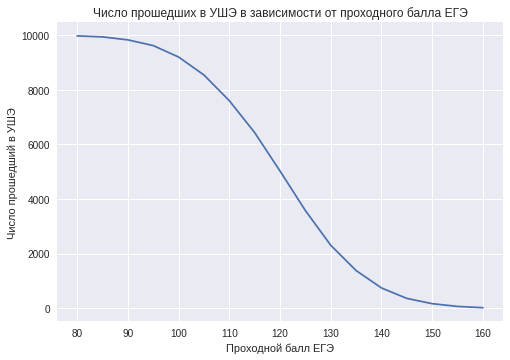

In [19]:
plt.plot(n, nprosh)
plt.title('Число прошедших в УШЭ в зависимости от проходного балла ЕГЭ')
plt.ylabel('Число прошедший в УШЭ')
plt.xlabel('Проходной балл ЕГЭ')
plt.show()

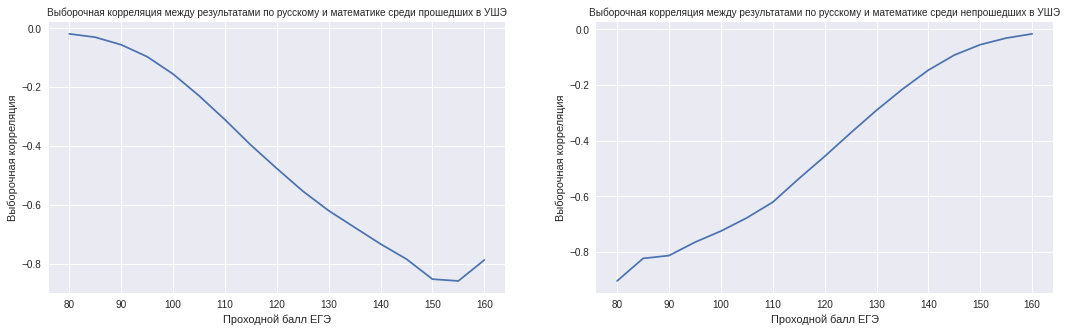

In [20]:
corr= []
corr1= []
for i in range(len(n)):
  corr.append(np.corrcoef(mat[proshel[i][0]], rus[proshel[i][0]])[0][1])
for i in range(len(n)):
  corr1.append(np.corrcoef(mat[neproshel[i][0]], rus[neproshel[i][0]])[0][1])
fig, ax = plt.subplots(1,2, figsize = (18,5))
ax[0].plot(n,corr)
ax[0].set_title('Выборочная корреляция между результатами по русскому и математике среди прошедших в УШЭ', fontsize='medium')
ax[0].set_xlabel('Проходной балл ЕГЭ')
ax[0].set_ylabel('Выборочная корреляция')
ax[1].plot(n,corr1)
ax[1].set_title('Выборочная корреляция между результатами по русскому и математике среди непрошедших в УШЭ', fontsize='medium')
ax[1].set_xlabel('Проходной балл ЕГЭ')
ax[1].set_ylabel('Выборочная корреляция')
plt.show()

###Задача 4 "Парадокс Штайна"

In [0]:
np.random.seed(seed)
X_i = np.random.normal(60, 10, size = (10000,100))
Y_i = np.random.normal(70, 10, size = (10000,100))
Z_i = np.random.normal(80, 10, size = (10000,100))

Мы знаем, что ММП оценка для математического ожидания для нормального распределения - это  выборочное среднее

In [0]:
hatmu_x = X_i.sum(axis=1)/100 # Оценки мат ожидания поднятия туловища для Ниф-Нифа в 10**4 симуляциях
hatmu_y = Y_i.sum(axis=1)/100 # Оценки мат ожидания поднятия туловища для Наф-Нафа в 10**4 симуляциях
hatmu_z = Z_i.sum(axis=1)/100 # Оценки мат ожидания поднятия туловища для Нуф-Нуфа в 10**4 симуляциях

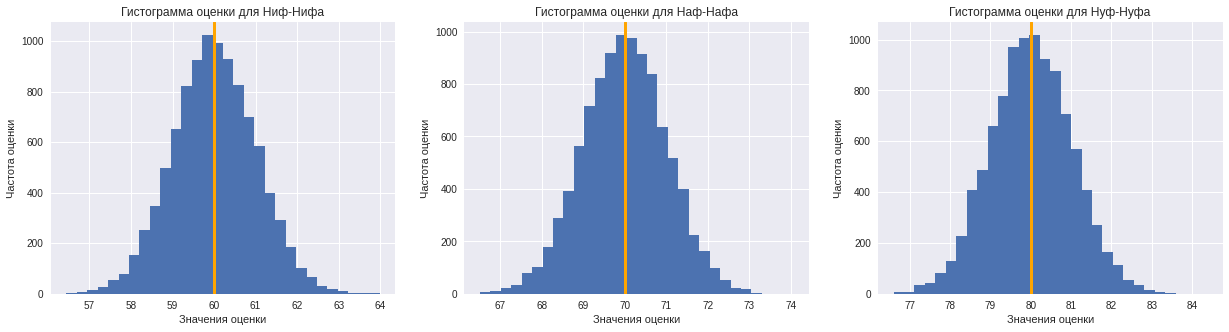

In [23]:
fig, ax = plt.subplots(1,3, figsize = (21,5))
ax[0].hist(hatmu_x, bins = 30)
ax[0].axvline(60, color = 'orange', lw=3)
ax[0].set_title('Гистограмма оценки для Ниф-Нифа')
ax[0].set_xlabel('Значения оценки')
ax[0].set_ylabel('Частота оценки')
ax[1].hist(hatmu_y, bins = 30)
ax[1].axvline(70, color = 'orange', lw=3)
ax[1].set_title('Гистограмма оценки для Наф-Нафа')
ax[1].set_xlabel('Значения оценки')
ax[1].set_ylabel('Частота оценки')
ax[2].hist(hatmu_z, bins = 30)
ax[2].axvline(80, color = 'orange', lw=3)
ax[2].set_title('Гистограмма оценки для Нуф-Нуфа')
ax[2].set_xlabel('Значения оценки')
ax[2].set_ylabel('Частота оценки')
plt.show()

In [24]:
s = (hatmu_x - np.array([60]*len(hatmu_x)))**2 + (hatmu_y - np.array([70]*len(hatmu_y)))**2 +(hatmu_z - np.array([80]*len(hatmu_z)))**2 # суммарная квадратичная ошибка
print(f'Оценка математического ожидания суммарной квадратичной ошибки:{s.mean()}')

Оценка математического ожидания суммарной квадратичной ошибки:3.012701343075659


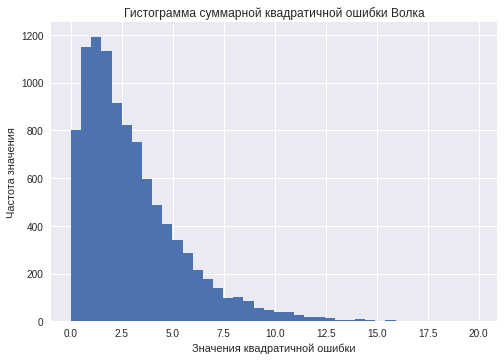

In [25]:
plt.style.use('seaborn')
plt.hist(s, bins = 40)
plt.title('Гистограмма суммарной квадратичной ошибки Волка')
plt.xlabel('Значения квадратичной ошибки')
plt.ylabel('Частота значения')
plt.show()

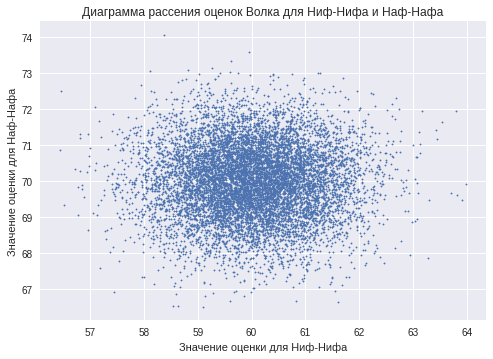

In [26]:
plt.scatter(hatmu_x,hatmu_y, s = 2)
plt.title('Диаграмма рассения оценок Волка для Ниф-Нифа и Наф-Нафа')
plt.xlabel('Значение оценки для Ниф-Нифа')
plt.ylabel('Значение оценки для Наф-Нафа')
plt.show()

In [27]:
print(f'Выборочная корреляция оценок Волка для Ниф-Нифа и Наф-Нафа: {np.corrcoef(hatmu_x,hatmu_y)[0][1]}')

Выборочная корреляция оценок Волка для Ниф-Нифа и Наф-Нафа: -0.0026060764341520647


In [0]:
hatmu = np.array([hatmu_x, hatmu_y , hatmu_z]) # создадим матрицу оценок Волка
lis = hatmu * (1-1/(((hatmu**2).sum(axis=1)**0.5)**2).sum()) # получим матрицу оценок Лиса

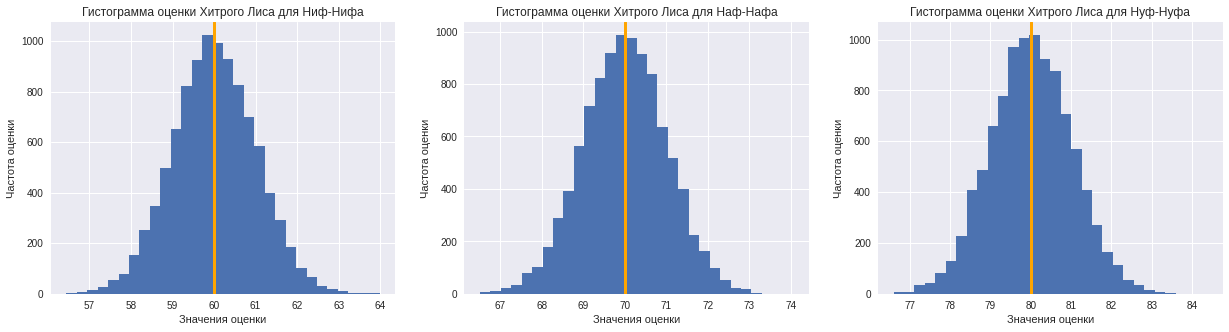

In [30]:
fig, ax = plt.subplots(1,3, figsize = (21,5))
ax[0].hist(lis[0], bins = 30)
ax[0].axvline(60, color = 'orange', lw=3)
ax[0].set_title('Гистограмма оценки Хитрого Лиса для Ниф-Нифа')
ax[0].set_xlabel('Значения оценки')
ax[0].set_ylabel('Частота оценки')
ax[1].hist(lis[1], bins = 30)
ax[1].axvline(70, color = 'orange', lw=3)
ax[1].set_title('Гистограмма оценки Хитрого Лиса для Наф-Нафа')
ax[1].set_xlabel('Значения оценки')
ax[1].set_ylabel('Частота оценки')
ax[2].hist(lis[2], bins = 30)
ax[2].axvline(80, color = 'orange', lw=3)
ax[2].set_title('Гистограмма оценки Хитрого Лиса для Нуф-Нуфа')
ax[2].set_xlabel('Значения оценки')
ax[2].set_ylabel('Частота оценки')
plt.show()

In [31]:
s1 = ((lis[0] - np.array([60]*len(lis[0])))**2 + (lis[1] - np.array([70]*len(lis[1])))**2 +(lis[2] - np.array([80]*len(lis[2])))**2)
print(f'Оценка математического ожидания суммарной квадратичной ошибки Лиса:{s1.mean()}')

Оценка математического ожидания суммарной квадратичной ошибки Лиса:3.012701283372245


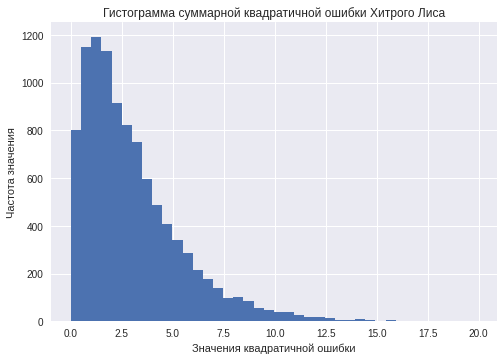

In [32]:
plt.hist(s1, bins = 40)
plt.title('Гистограмма суммарной квадратичной ошибки Хитрого Лиса')
plt.xlabel('Значения квадратичной ошибки')
plt.ylabel('Частота значения')
plt.show()

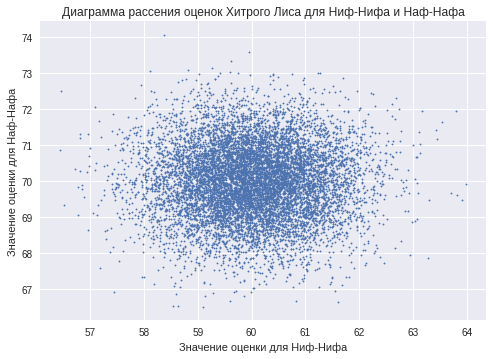

In [33]:
plt.scatter(lis[0], lis[1], s = 2)
plt.title('Диаграмма рассения оценок Хитрого Лиса для Ниф-Нифа и Наф-Нафа')
plt.xlabel('Значение оценки для Ниф-Нифа')
plt.ylabel('Значение оценки для Наф-Нафа')
plt.show()

In [34]:
print(f'Оценка Волка для Ниф-Нифа: {hatmu.mean(axis=1)[0]}')
print(f'Оценка Хитрого Лиса для Ниф-Нифа: {lis.mean(axis=1)[0]}')
print(f'Оценка математического ожидания квадратичной ошибки Волка дли Ниф-Нифа:{((hatmu[0]-60)**2).mean()}')
print(f'Оценка математического ожидания квадратичной ошибки Лиса дли Ниф-Нифа: {((lis[0]-60)**2).mean()}')

Оценка Волка для Ниф-Нифа: 60.009884186162786
Оценка Хитрого Лиса для Ниф-Нифа: 60.00988378357094
Оценка математического ожидания квадратичной ошибки Волка дли Ниф-Нифа:0.9923800512055535
Оценка математического ожидания квадратичной ошибки Лиса дли Ниф-Нифа: 0.9923800299331642


Хитрый Лис в среднем незначительно, но ближе к математическому ожиданию дает оценки для поднятий туловища Ниф-Нифа, чем Волк, а также имеет чуть меньшую оценку математического ожидания квадратичной ошибки для Ниф-Нифа $\Rightarrow$ Хитрый лис лучше оценивает накачанность Ниф-Нифа

In [36]:
print(f'Оценка Волка для вектора Трёх поросят: {hatmu.mean(axis=1)}')
print(f'Оценка Хитрого Лиса для вектора Трёх поросят: {lis.mean(axis=1)}')
print(f'Оценка математического ожидания суммарной квадратичной ошибки Волка для вектора Трёх поросят:{s.mean()}')
print(f'Оценка математического ожидания суммарной квадратичной ошибки Лиса для вектора Трёх поросят: {s1.mean()}')

Оценка Волка для вектора Трёх поросят: [60.00988419 69.9966184  80.01350839]
Оценка Хитрого Лиса для вектора Трёх поросят: [60.00988378 69.99661793 80.01350785]
Оценка математического ожидания суммарной квадратичной ошибки Волка для вектора Трёх поросят:3.012701343075659
Оценка математического ожидания суммарной квадратичной ошибки Лиса для вектора Трёх поросят: 3.012701283372245


Хитрый Лис в среднем незначительно, но ближе к математическому ожиданию дает оценки для поднятий туловища каждого из поросят, чем Волк, а также имеет чуть меньшую оценку математического ожидания суммарной квадратичной ошибки $\Rightarrow$ Хитрый лис точнее оценивает вектор накачанности Трёх Поросят
